# Comparing Clustering Algorthims Using Simulated Data and the Iris Dataset

This kernel serves as an exploratory analysis to compare several clustering algorithms against each other in different simulated scenarios before finally applying them towards a real dataset in the Iris dataset. The 4 clustering algorithms which we will explore have been decided after careful research on the following articles: "10 Clustering Algorithms With Python" and "The 5 Clustering Algorithms Data Scientists Need to Know". The 4 algorithms which will be compared are based upon popularity and include:
* K-means Clustering - Using the 'kmeans' function in R. K-means is the most popular clustering algorithm for machine learning purposes, the benefit of this algorithm is its quick computation speed making it more practical for larger datasets.
* Hierarchical Clustering - Using the 'hclust' function in R. There are several linkage methods within Hierarchical clustering for calculating the distance between points. We will compare the Complete, Average, and Single linkage methods for each simulated scenario and select the best fitting method to represent hierarchical clustering. <br>
* Model-based Clustering Using Guassian Mixture Models - Model-based clustering involves fitting a distribution to represent each cluster. All points in a cluster come from the same statistical distribution and these distributions can overlap. For this analysis, we will be assuming that all distributions are guassian (normal) models.
* Density-based Spacial Clustering of Applications with Noise (DBSCAN) - This algorithm does not require specification of cluster numbers and selects the optimal cluster number as part of the algorithm. However, this algorthim requires most fine-tuning of parameters than the other algorithms.

Table of Contents: <br>
&emsp; [Three Distinct Clusters](#3_clusts) <br>
&emsp; [Three Less Distinct Clusters](#3_less_clusts) <br>
&emsp; [Three Stripes](#3_stripes) <br>
&emsp; [Three Rings](#3_rings) <br>
&emsp; [Clustering the Iris Dataset](#iris) <br>

In [1]:
options(warn=-1)
library(MASS)
library(dbscan)
library(ggplot2)
library(repr)
library(gridExtra)
library(meanShiftR)
library(mclust)
library(factoextra)
set.seed(1055)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


<a id='3_clusts'></a>
## Three Distinct Clusters
We will start by clustering on a clear-cut simulated dataset with 3 distinct groupings. This is performed by generating data from the normal distribution for both the X and Y axes, we generate three groups at $\mu$ = 1, 5, and 8 with $\sigma = 0.8$ for all clusters. We set the $\sigma$ value to be low so that there is no overlap between the groups, we expect all the clustering algorithms to perform well in this scenario.

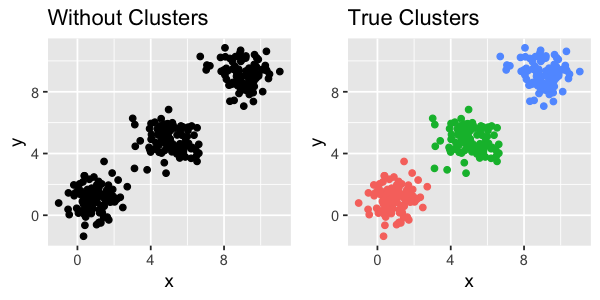

In [2]:
options(repr.plot.width=5, repr.plot.height=2.5)
x = rnorm(100,1,.8)
y = rnorm(100,1,.8)
one = rep(1,100)
clust1 = cbind(one,x,y)
x = rnorm(100,5,.8)
y = rnorm(100,5,.8)
two = rep(2,100)
clust2 = cbind(two,x,y)
x = rnorm(100,9,.8)
y = rnorm(100,9,.8)
three = rep(3,100)
clust3 = cbind(three,x,y)
df1 = rbind(clust1,clust2,clust3)
df1 = data.frame(df1)
p1 = ggplot(df1,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters')
p2 = ggplot(df1,aes(x=x,y=y,color=as.factor(one)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters')
grid.arrange(p1,p2,nrow = 1)

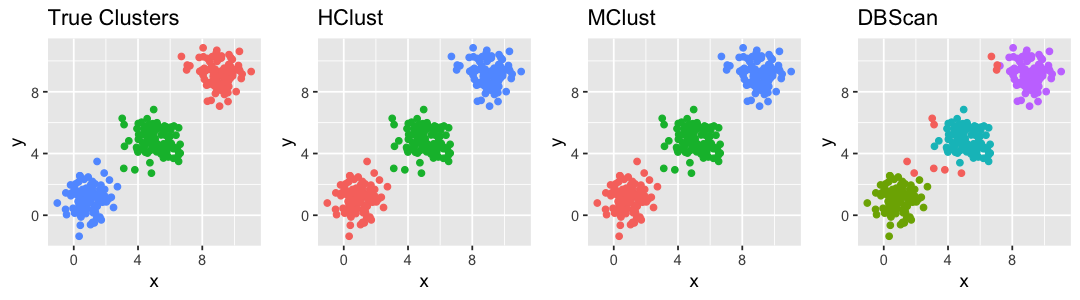

In [3]:
options(repr.plot.width=9, repr.plot.height=2.5)
km = kmeans(df1,centers=3)
p1 = ggplot(df1,aes(x=x,y=y,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-Means')+ggtitle('True Clusters')
dists = dist(df1)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df1,aes(x=x,y=y,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df1,3)
p3 =ggplot(df1,aes(x=x,y=y,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust') 
dbs=dbscan(df1,eps = .8,minPts = 6)
p4 = ggplot(df1,aes(x=x,y=y,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

<a id='3_less_clusts'></a>
## Three Less Distinct Clusters
In this example, we increase the variation of the clusters so that there is more overlap between groups. This creates a more difficult dataset for clustering algorithms to predict.

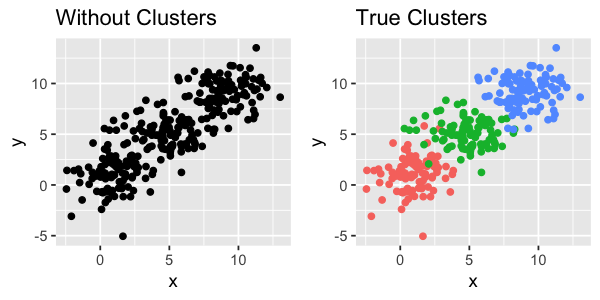

In [4]:
options(repr.plot.width=5, repr.plot.height=2.5)
x = rnorm(100,1,1.5)
y = rnorm(100,1,1.5)
one = rep(1,100)
clust1 = cbind(one,x,y)
x = rnorm(100,5,1.5)
y = rnorm(100,5,1.5)
two = rep(2,100)
clust2 = cbind(two,x,y)
x = rnorm(100,9,1.5)
y = rnorm(100,9,1.5)
three = rep(3,100)
clust3 = cbind(three,x,y)
df2 = rbind(clust1,clust2,clust3)
df2 = data.frame(df2)
p1 = ggplot(df2,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df2,aes(x=x,y=y,color=as.factor(one)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters') 
grid.arrange(p1,p2,nrow = 1)

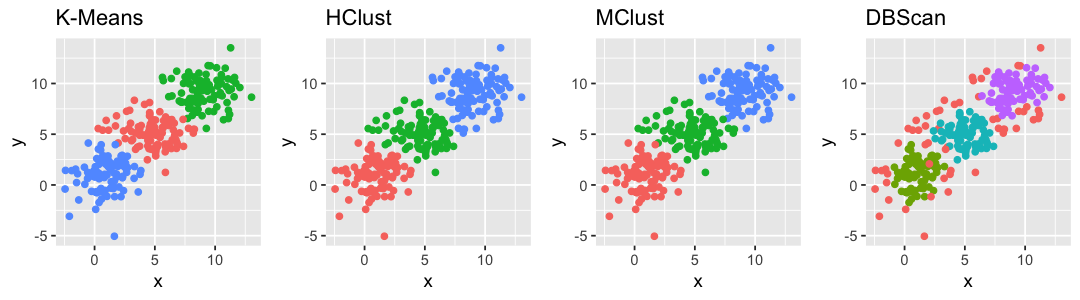

In [5]:
options(repr.plot.width=9, repr.plot.height=2.5)
km = kmeans(df2,centers=3)
p1 = ggplot(df2,aes(x=x,y=y,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-Means')
dists = dist(df2)
hc = hclust(dists,'complete')
ct = cutree(hc,3)
p2 =ggplot(df2,aes(x=x,y=y,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df2,3)
p3 =ggplot(df2,aes(x=x,y=y,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust')
dbs=dbscan(df2,eps = .8,minPts = 6)
p4=ggplot(df2,aes(x=x,y=y,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

The complete linkage method was selected for hierarchical clustering. We observe that while the K-means, Hierarchical, and Model-based clustering algorithms all perform relatively well, neither of them account for the overlapping of points between clusters. DBScan clustering once again 

<a id='3_stripes'></a>
## Three Stripes

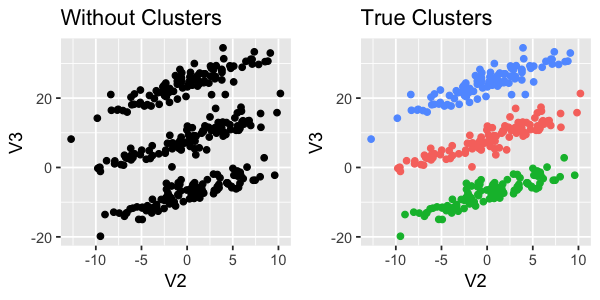

In [6]:
options(repr.plot.width=5, repr.plot.height=2.5)
dist1 = mvrnorm(100, c(0, 8), matrix(c(20, 18, 18, 20), nrow = 2))
dist2 = mvrnorm(100, c(0, -8), matrix(c(20, 18, 18, 20), nrow = 2))
dist3 = mvrnorm(100, c(0, 24), matrix(c(20, 18, 18, 20), nrow = 2))
labs1 = rep(1, 100)
labs2 = rep(2, 100)
labs3 = rep(3, 100)
clust1 = cbind(labs1,dist1)
clust2 = cbind(labs2,dist2)
clust3 = cbind(labs3,dist3)
df4 = rbind(clust1,clust2,clust3)
df4 = data.frame(df4)
p1 = ggplot(df4,aes(x=V2,y=V3))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df4,aes(x=V2,y=V3,color = as.factor(labs1)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters')
grid.arrange(p1,p2,nrow = 1)

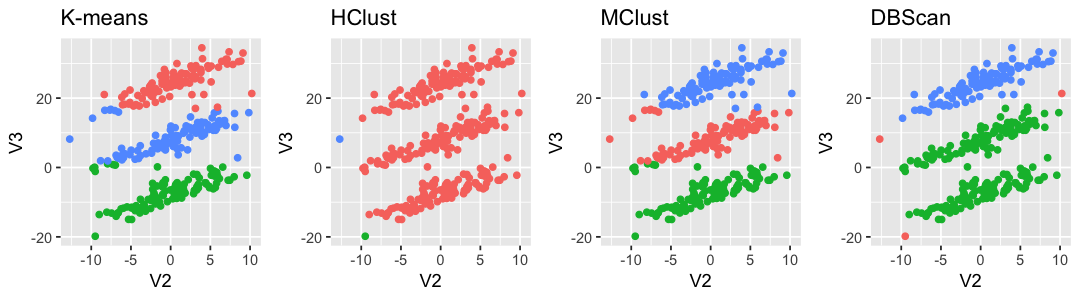

In [7]:
options(repr.plot.width=9, repr.plot.height=2.5)
#Initialize K-means
km = kmeans(df4,centers=3)
p1 = ggplot(df4,aes(x=V2,y=V3,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-means') 
#Initialize Hclust
dists = dist(df4)
hc = hclust(dists,'single')
ct = cutree(hc,3)
p2 =ggplot(df4,aes(x=V2,y=V3,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df4,3)
p3 =ggplot(df4,aes(x=V2,y=V3,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust')
dbs=dbscan(df4,eps =4)
p4=ggplot(df4,aes(x=V2,y=V3,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

The single linkage method was selected for hierarchical clustering in this scenario. We observe that both hierarchical clustering and DBScan obtain the correct clusters, while K-means and Model-based clustering appear to cluster based on horizontal groupings and therefore have overlap between clusters.

<a id='3_rings'></a>
## Three Rings

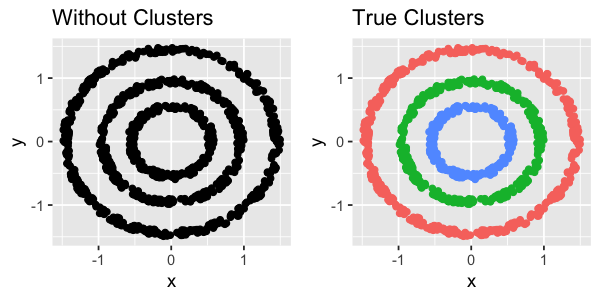

In [8]:
options(repr.plot.width=5, repr.plot.height=2.5)
outer = 1.5
inner = 1.4
n <- 400
rho <- sqrt(runif(n,inner^2,outer^2))
theta <- runif(n, 0, 2*pi)
x <- rho * cos(theta)
y <- rho * sin(theta)
labs = rep(1,400)
clust1 = cbind(labs,x,y)
outer = .6
inner = .5
outer = 1
inner = 0.9
n <- 300
rho <- sqrt(runif(n,inner^2,outer^2))
theta <- runif(n, 0, 2*pi)
x <- rho * cos(theta)
y <- rho * sin(theta)
labs = rep(2,300)
clust2 = cbind(labs,x,y)
outer = .6
inner = .5
n <- 200
rho <- sqrt(runif(n,inner^2,outer^2))
theta <- runif(n, 0, 2*pi)
x <- rho * cos(theta)
y <- rho * sin(theta)
labs = rep(3,200)
clust3 = cbind(labs,x,y)
df3 = rbind(clust1, clust2, clust3)
df3 = data.frame(df3)
p1 = ggplot(df3,aes(x=x,y=y))+geom_point()+ggtitle('Without Clusters') 
p2 = ggplot(df3,aes(x=x,y=y,color = as.factor(labs)))+geom_point()+theme(legend.position = "none")+ggtitle('True Clusters') 
grid.arrange(p1,p2,nrow = 1)

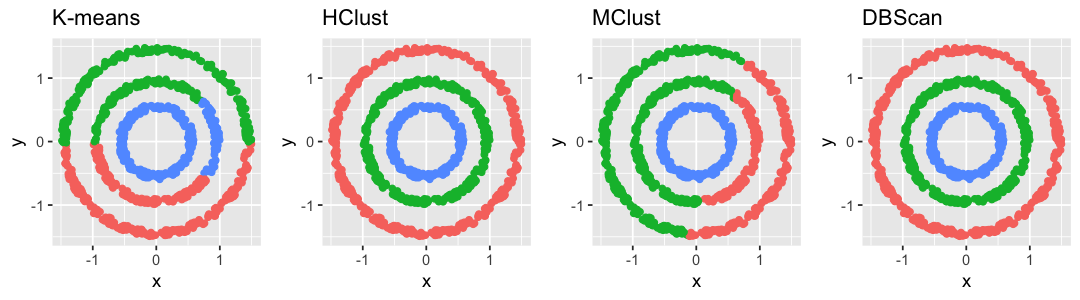

In [9]:
options(repr.plot.width=9, repr.plot.height=2.5)
#Initialize K-means
km = kmeans(df3,centers=3)
p1 = ggplot(df3,aes(x=x,y=y,color=as.factor(km$cluster)))+geom_point()+theme(legend.position = "none")+ggtitle('K-means') 
#Initialize Hclust
dists = dist(df3)
hc = hclust(dists,'single')
ct = cutree(hc,3)
p2 =ggplot(df3,aes(x=x,y=y,color=as.factor(ct)))+geom_point()+theme(legend.position = "none")+ggtitle('HClust') 
mc = Mclust(df3,3)
p3 =ggplot(df3,aes(x=x,y=y,color=as.factor(mc$classification)))+geom_point()+theme(legend.position="none")+ggtitle('MClust')
dbs=dbscan(df3,eps =.2,minPts = 5)
p4=ggplot(df3,aes(x=x,y=y,color=as.factor(dbs$cluster)))+geom_point()+theme(legend.position="none")+ggtitle('DBScan')
grid.arrange(p1,p2,p3,p4,nrow = 1)

The single linkage hierarchical clustering was once again selected as the preferred hierarchical clustering method. We observe that both the DBScan and HClust algorithms perform well on this simulation and assign the correct groupings.

<a id='iris'></a>
## Clustering the Iris Dataset
Now that we have compared the algorithms across many simulated scenarios, it is time to test these algorithms on a real-world application through the Iris dataset. The Iris dataset consists of 150 total observations separately evenly into 3 classes (50 observations each), where each class represents a different type of iris flower and each observation represents a single flower. Along with the Iris type, the dataset contains 4 additional predictor variables which are the length and width of both the sepals and petals of each flower.

As this dataset is already saved into the R programming language, we don't need to import it. We call the dataset using the 'iris' variable

In [10]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [11]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


We observe that there are 5 variables, as mentioned above in the dataset description. The 'Species' variable specifies which of the 3 species (classes) the flower belongs to. While the remaining variables are all numerical and specifiy different measurements that define the flower type. Next we will visualize the dataset through scatterplot matrix colored by the true species.

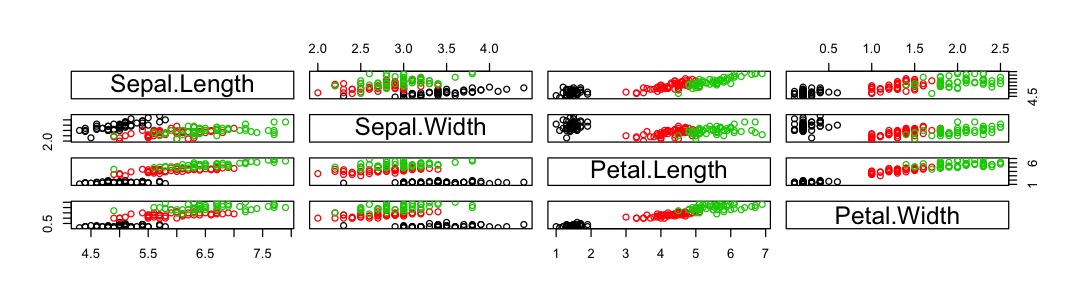

In [12]:
plot(iris[1:4],col = iris$Species)

We observe that while 1 species (in black) is well distinctified across all pairs of variables, the other two variables (in red and green) are very close and even overlapping depending on the variables being plotted. We will now begin clustering our dataset. Given that we know the actual clusters, we will be able to compare our predicted clusters against our actual clusters and observe model accuracy.

We prepare are dataset by creating a subset dataset that does not include the 'Species' variable, we will use this dataset for clustering. Next we label encode the 'Species' variable into numerical values so that it will be easier to calculate accuracy. We also create a function that calculates accuracy given the real and predicted classes.

In [13]:
acc = function(true, pred){sum(true==pred)/length(true)}
iris_clust = iris[1:4]
real = as.numeric(iris$Species)
real

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

### K-means Clustering

In [14]:
km = kmeans(iris_clust,centers=3)
km$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

In [15]:
acc(real,km$cluster)

[1] 0.8933333

### Hierarchical Clustering

In [16]:
dists = dist(iris_clust)
hc2 = hclust(dists,'average')
ct2 = cutree(hc2,3)
ct2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

In [17]:
acc(real,ct2)

[1] 0.9066667

### Model-based Clustering

In [18]:
mc = Mclust(iris_clust,3)
mc$classification

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

In [19]:
acc(real,mc$classification)

[1] 0.9666667

# References
Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 13 Dec. 2020, towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
<br>
<br>
Brownlee, Jason. “10 Clustering Algorithms With Python.” Machine Learning Mastery, 20 Aug. 2020, machinelearningmastery.com/clustering-algorithms-with-python/. 